In [1]:
'''Import packages for loading data, analysing, and plotting'''

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib as mpl
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma
import csv


import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
# define filenames and their directories

directory = '../../../../Documents/ModellingData'

directory2 = '../../../../Documents'

AMOC variables:
- 'amoc_amo_lag_cor'
- 'amoc_mean_ann'
- 'amoc_pattern_ann'
- 'amoc_spectra_ann'
- 'amoc_sst_regression_ann'
- 'amoc_stddev_ann'
- 'amoc_tas_regression_ann'
- 'amoc_timeseries_ann'
- 'sst_spatialmean_ann' -> annual SST
- 'sst_spatialmean_jja' -> summer SST

LIG models:
- CESM2 -> a1 = lig127k, b1 = piControl
- FGOALS-f3-L -> a2 = lig127k, b2 = piControl --> piControl run has no AMOC: Chris said to use parts of historical run as proxy
- GISS-E2-1-G -> a3 = lig127k, b3 = piControl
- IPSL-CM6A-LR -> a4 = lig127k, b4 = piControl

In [3]:
# CESM2 LIG -> a1

filename_a1 = '%s/CESM2_lig127k.cvdp_data.1-700.nc'%directory

# load files via xarray

expt_a1_file = xr.open_dataset(filename_a1,decode_times=False)

lat_a1 = expt_a1_file['lat']
lat_amoc_a1 = expt_a1_file['lat_amoc']
lon_a1 = expt_a1_file['lon']
depth_a1 = expt_a1_file['lev']
time_a1 = expt_a1_file['time']

sst_spatialmean_ann_a1 = expt_a1_file['sst_spatialmean_ann']
sst_spatialmean_jja_a1 = expt_a1_file['sst_spatialmean_jja']

/Users/sophiesax/anaconda3/lib/python3.8/site-packages/xarray/conventions.py:490: SerializationWarning: variable 'nino34_autocorrelation' has multiple fill values {-1073741800.0, 1e+30}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [4]:
# CESM piControl -> b1

filename_b1 = '%s/CESM2_piControl.cvdp_data.701-1200.nc'%directory

# load files via xarray

expt_b1_file = xr.open_dataset(filename_b1,decode_times=False)

lat_b1 = expt_b1_file['lat']
lat_amoc_b1 = expt_b1_file['lat_amoc']
lon_b1 = expt_b1_file['lon']
depth_b1 = expt_b1_file['lev']
time_b1 = expt_b1_file['time']

sst_spatialmean_ann_b1 = expt_b1_file['sst_spatialmean_ann']
sst_spatialmean_jja_b1 = expt_b1_file['sst_spatialmean_jja']

In [5]:
# FGOALS-f3-L LIG -> a2

filename_a2 = '%s/FGOALS-f3-L_lig127k.cvdp_data.700-1199.nc'%directory

# load files via xarray

expt_a2_file = xr.open_dataset(filename_a2,decode_times=False)

lat_a2 = expt_a2_file['lat']
lat_amoc_a2 = expt_a2_file['lat_amoc']
lon_a2 = expt_a2_file['lon']
depth_a2 = expt_a2_file['lev']
time_a2 = expt_a2_file['time']

sst_spatialmean_ann_a2 = expt_a2_file['sst_spatialmean_ann']
sst_spatialmean_jja_a2 = expt_a2_file['sst_spatialmean_jja']

In [6]:
# FGOALS-f3-L piControl -> b2 -> no AMOC variables, 
# use historical run as proxy

filename_b2 = '%s/FGOALS-f3-L_piCtl-substitute.cvdp_data.1850-1899.nc'%directory

# load files via xarray

expt_b2_file = xr.open_dataset(filename_b2,decode_times=False)

lat_b2 = expt_b2_file['lat']
lat_amoc_b2 = expt_b2_file['lat_amoc']
lon_b2 = expt_b2_file['lon']
depth_b2 = expt_b2_file['lev']
time_b2 = expt_b2_file['time']

sst_spatialmean_ann_b2 = expt_b2_file['sst_spatialmean_ann']
sst_spatialmean_jja_b2 = expt_b2_file['sst_spatialmean_jja']

In [7]:
# GISS-E2-1-G LIG -> a3

filename_a3 = '%s/GISS-E2-1-G_lig127k.cvdp_data.2900-2999.nc'%directory

# load files via xarray

expt_a3_file = xr.open_dataset(filename_a3,decode_times=False)

lat_a3 = expt_a3_file['lat']
lat_amoc_a3 = expt_a3_file['lat_amoc']
lon_a3 = expt_a3_file['lon']
depth_a3 = expt_a3_file['lev']
time_a3 = expt_a3_file['time']

sst_spatialmean_ann_a3 = expt_a3_file['sst_spatialmean_ann']
sst_spatialmean_jja_a3 = expt_a3_file['sst_spatialmean_jja']

In [8]:
# GISS-E2-1-G piControl -> b3

filename_b3 = '%s/GISS-E2-1-G_piControl.cvdp_data.4150-5000.nc'%directory

# load files via xarray

expt_b3_file = xr.open_dataset(filename_b3,decode_times=False)

lat_b3 = expt_b3_file['lat']
lat_amoc_b3 = expt_b3_file['lat_amoc']
lon_b3 = expt_b3_file['lon']
depth_b3 = expt_b3_file['lev']
time_b3 = expt_b3_file['time']

sst_spatialmean_ann_b3 = expt_b3_file['sst_spatialmean_ann']
sst_spatialmean_jja_b3 = expt_b3_file['sst_spatialmean_jja']

In [9]:
# IPSL-CM6A-LR LIG -> a4

filename_a4 = '%s/IPSL-CM6A-LR_lig127k.cvdp_data.1850-2399.nc'%directory

# load files via xarray

expt_a4_file = xr.open_dataset(filename_a4,decode_times=False)

lat_a4 = expt_a4_file['lat']
lat_amoc_a4 = expt_a4_file['lat_amoc']
lon_a4 = expt_a4_file['lon']
depth_a4 = expt_a4_file['lev']
time_a4 = expt_a4_file['time']

sst_spatialmean_ann_a4 = expt_a4_file['sst_spatialmean_ann']
sst_spatialmean_jja_a4 = expt_a4_file['sst_spatialmean_jja']

In [10]:
# IPSL-CM6A-LR piControl -> b4

filename_b4 = '%s/IPSL-CM6A-LR_piControl.cvdp_data.1850-3049.nc'%directory

# load files via xarray

expt_b4_file = xr.open_dataset(filename_b4,decode_times=False)

lat_b4 = expt_b4_file['lat']
lat_amoc_b4 = expt_b4_file['lat_amoc']
lon_b4 = expt_b4_file['lon']
depth_b4 = expt_b4_file['lev']
time_b4 = expt_b4_file['time']

sst_spatialmean_ann_b4 = expt_b4_file['sst_spatialmean_ann']
sst_spatialmean_jja_b4 = expt_b4_file['sst_spatialmean_jja']

In [39]:
# SST reconstruction from Capron et al (2017)

os.chdir("/Users/sophiesax/Documents")
SST127ka = pd.read_csv("Lat_Lon_SST_Capron.csv")
print(SST127ka)

              Core  Latitude  Longitude           Method  SST
0          HM71-19     69.49      -9.52  % N. pachyderma  1.5
1           PS1243     69.37      -6.55  % N. pachyderma  1.1
2           HM57-7     68.43     -13.87  % N. pachyderma  2.0
3           ODP644     66.67       4.57  % N. pachyderma -4.6
4        MD95-2009     62.74      -4.00              MAT -8.7
5           ENAM33     61.27     -11.16            WAPLS -0.6
6      EW9302-JPC8     61.00     -25.00              MAT  5.9
7        MD95-2014     60.58     -22.07              MAT  2.8
8        MD99-2227     58.21     -48.37            Mg/Ca -3.1
9    MD03-2664_MAT     57.44     -48.61              MAT  2.9
10  MD03-2664_MgCa     57.00     -48.00            Mg/Ca -1.0
11         ODP 980     55.80     -14.11              MAT  1.0
12         NA87-25     55.57     -14.75              MAT  1.5
13        M23414-9     53.54     -20.28              MAT  1.7
14         NEAP18K     53.00     -30.00              MAT  1.8
15      

In [18]:
print(sst_spatialmean_jja_a1)

<xarray.DataArray 'sst_spatialmean_jja' (lat: 192, lon: 288)>
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       ...,
       [-0.554485, -0.554324, -0.554207, ..., -0.555023, -0.554863, -0.554696],
       [-0.554269, -0.554257, -0.554239, ..., -0.554405, -0.554307, -0.554279],
       [-0.549536, -0.549575, -0.549611, ..., -0.549393, -0.549445, -0.549493]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Attributes:
    variable_id:             ts
    units:                   C
    type:                    real
    title:                   Surface Temperature
    time_title:              Temporal mean
    time_label:              time-mean
    standard_

Text(0, 0.5, 'SST mean (JJA) [°C]')

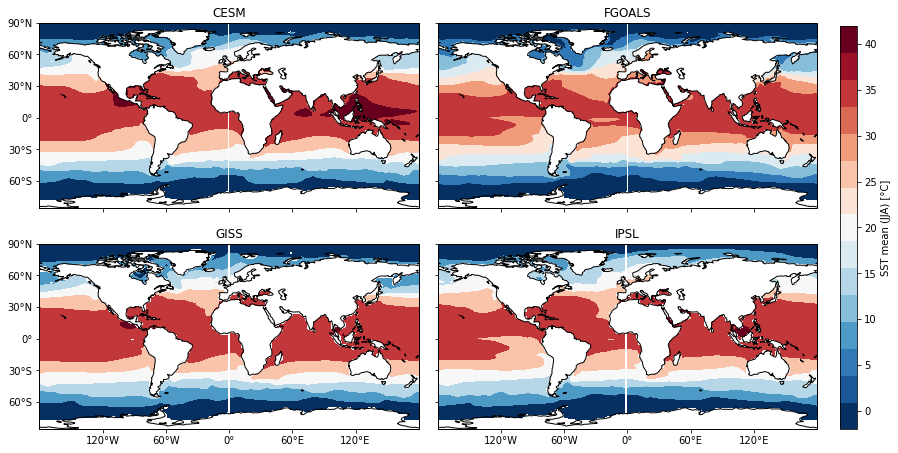

In [29]:
fig, axs = plt.subplots(2, 2, figsize = (16, 8), sharex = 'col', sharey = 'row', gridspec_kw = {'wspace':0.05, 'hspace':0.03}, subplot_kw={'projection': ccrs.PlateCarree()})
(ax1, ax2), (ax3, ax4) = axs
#fig.suptitle('SST (LIG)', fontsize = 16)

cmap = plt.get_cmap('RdBu_r', 15)

cont = ax1.contourf(lon_a1, lat_a1, sst_spatialmean_jja_a1, cmap = cmap, norm = mpl.colors.Normalize(vmin = -5, vmax = 35), transform = ccrs.PlateCarree())

cont = ax2.contourf(lon_a2, lat_a2, sst_spatialmean_jja_a2, cmap = cmap, norm = mpl.colors.Normalize(vmin = -5, vmax = 35), transform = ccrs.PlateCarree())

cont = ax3.contourf(lon_a3, lat_a3, sst_spatialmean_jja_a3, cmap = cmap, norm = mpl.colors.Normalize(vmin = -5, vmax = 35), transform = ccrs.PlateCarree())

cont = ax4.contourf(lon_a4, lat_a4, sst_spatialmean_jja_a4, cmap = cmap, norm = mpl.colors.Normalize(vmin = -5, vmax = 35), transform = ccrs.PlateCarree())

ax1.set_title('CESM')
ax2.set_title('FGOALS')
ax3.set_title('GISS')
ax4.set_title('IPSL')

ax1.coastlines()
ax2.coastlines()
ax3.coastlines()
ax4.coastlines()

ax1.set_xticks([-120, -60, 0, 60, 120], crs=ccrs.PlateCarree())
ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

ax2.set_xticks([-120, -60, 0, 60, 120], crs=ccrs.PlateCarree())
ax2.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

ax3.set_xticks([-120, -60, 0, 60, 120], crs=ccrs.PlateCarree())
ax3.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

ax4.set_xticks([-120, -60, 0, 60, 120], crs=ccrs.PlateCarree())
ax4.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

ax1.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax1.yaxis.set_major_formatter(LATITUDE_FORMATTER)

ax2.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax2.yaxis.set_major_formatter(LATITUDE_FORMATTER)

ax3.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax3.yaxis.set_major_formatter(LATITUDE_FORMATTER)

ax4.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax4.yaxis.set_major_formatter(LATITUDE_FORMATTER)

fig.subplots_adjust(right = 0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.015, 0.7])
sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = -2, vmax = 42))
sm.set_array([])
cbar = fig.colorbar(sm, cax = cbar_ax)
cbar.ax.set_ylabel('SST mean (JJA) ['u"\N{DEGREE SIGN}"'C]')

#plt.setp(axs[-1, :], xlabel='longitude [degrees E]')
#plt.setp(axs[:, 0], ylabel='latitude [degrees N]')

#plt.savefig('SST_mean_jja_LIG_1.png')

Text(0, 0.5, 'SST mean (JJA) [°C]')

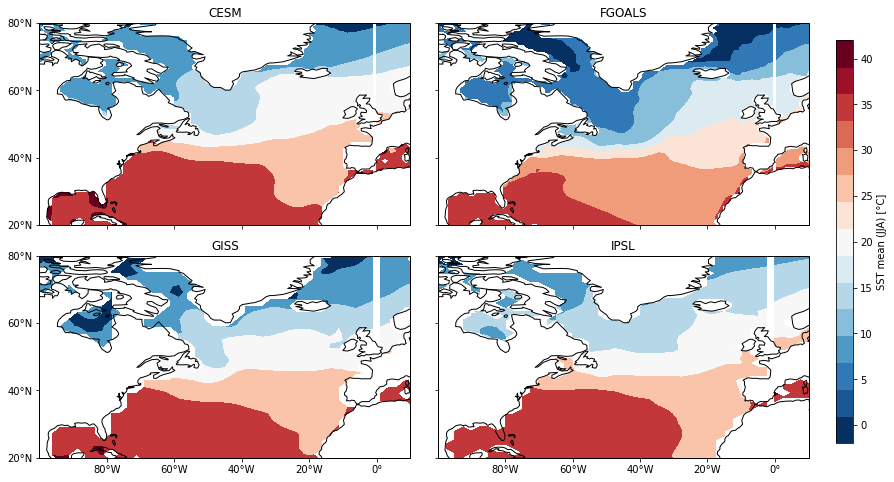

In [30]:
fig, axs = plt.subplots(2, 2, figsize = (16, 8), sharex = 'col', sharey = 'row', gridspec_kw = {'wspace':0.05, 'hspace':0.15}, subplot_kw={'projection': ccrs.PlateCarree()})
(ax1, ax2), (ax3, ax4) = axs
#fig.suptitle('SST (LIG)', fontsize = 16)

cmap = plt.get_cmap('RdBu_r', 15)

cont = ax1.contourf(lon_a1, lat_a1, sst_spatialmean_jja_a1, cmap = cmap, norm = mpl.colors.Normalize(vmin = -5, vmax = 35), transform = ccrs.PlateCarree())

cont = ax2.contourf(lon_a2, lat_a2, sst_spatialmean_jja_a2, cmap = cmap, norm = mpl.colors.Normalize(vmin = -5, vmax = 35), transform = ccrs.PlateCarree())

cont = ax3.contourf(lon_a3, lat_a3, sst_spatialmean_jja_a3, cmap = cmap, norm = mpl.colors.Normalize(vmin = -5, vmax = 35), transform = ccrs.PlateCarree())

cont = ax4.contourf(lon_a4, lat_a4, sst_spatialmean_jja_a4, cmap = cmap, norm = mpl.colors.Normalize(vmin = -5, vmax = 35), transform = ccrs.PlateCarree())

ax1.set_title('CESM')
ax2.set_title('FGOALS')
ax3.set_title('GISS')
ax4.set_title('IPSL')

ax1.coastlines()
ax2.coastlines()
ax3.coastlines()
ax4.coastlines()

ax1.set_xlim(-100, 10)
ax1.set_ylim(20, 80)

ax2.set_xlim(-100, 10)
ax2.set_ylim(20, 80)

ax3.set_xlim(-100, 10)
ax3.set_ylim(20, 80)

ax4.set_xlim(-100, 10)
ax4.set_ylim(20, 80)

ax1.set_xticks([-80, -60, -40, -20, 0], crs=ccrs.PlateCarree())
ax1.set_yticks([20, 40, 60, 80], crs=ccrs.PlateCarree())

ax2.set_xticks([-80, -60, -40, -20, 0], crs=ccrs.PlateCarree())
ax2.set_yticks([20, 40, 60, 80], crs=ccrs.PlateCarree())

ax3.set_xticks([-80, -60, -40, -20, 0], crs=ccrs.PlateCarree())
ax3.set_yticks([20, 40, 60, 80], crs=ccrs.PlateCarree())

ax4.set_xticks([-80, -60, -40, -20, 0], crs=ccrs.PlateCarree())
ax4.set_yticks([20, 40, 60, 80], crs=ccrs.PlateCarree())

ax1.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax1.yaxis.set_major_formatter(LATITUDE_FORMATTER)

ax2.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax2.yaxis.set_major_formatter(LATITUDE_FORMATTER)

ax3.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax3.yaxis.set_major_formatter(LATITUDE_FORMATTER)

ax4.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax4.yaxis.set_major_formatter(LATITUDE_FORMATTER)

fig.subplots_adjust(right = 0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.015, 0.7])
sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = -2, vmax = 42))
sm.set_array([])
cbar = fig.colorbar(sm, cax = cbar_ax)
cbar.ax.set_ylabel('SST mean (JJA) ['u"\N{DEGREE SIGN}"'C]')

#plt.setp(axs[-1, :], xlabel='longitude [degrees E]')
#plt.setp(axs[:, 0], ylabel='latitude [degrees N]')

#plt.savefig('SST_mean_LIG_1.png')

/Users/sophiesax/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


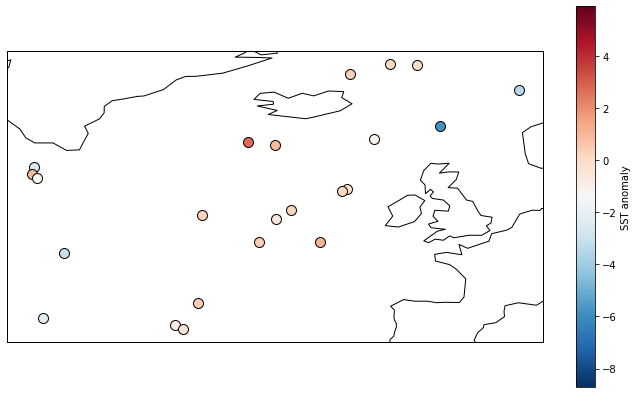

In [40]:
lats = SST127ka['Latitude']
lons = SST127ka['Longitude']
SST = SST127ka['SST']

fig, ax = plt.subplots(figsize = (12, 7), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()

SST_min = np.min(SST)
SST_max = np.max(SST)
cmap = plt.get_cmap('RdBu_r')
normalize = mpl.colors.Normalize(vmin = SST_min, vmax = SST_max)

for ii in range(0, len(SST)):
    x,y = lons[ii], lats[ii]
    color_interp = np.interp(SST[ii], [SST_min, SST_max], [50, 200])
    plt.plot(x, y, marker = 'o', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
    
cax, _ = mpl.colorbar.make_axes(ax)
cbar = mpl.colorbar.ColorbarBase(cax, cmap = cmap, norm = normalize, label = 'SST anomaly')


    SST                    geometry           Method
0   1.5   POINT (-9.52000 69.49000)  % N. pachyderma
1   1.1   POINT (-6.55000 69.37000)  % N. pachyderma
2   2.0  POINT (-13.87000 68.43000)  % N. pachyderma
3  -4.6    POINT (4.57000 66.67000)  % N. pachyderma
4  -8.7   POINT (-4.00000 62.74000)              MAT
5  -0.6  POINT (-11.16000 61.27000)            WAPLS
6   5.9  POINT (-25.00000 61.00000)              MAT
7   2.8  POINT (-22.07000 60.58000)              MAT
8  -3.1  POINT (-48.37000 58.21000)            Mg/Ca
9   2.9  POINT (-48.61000 57.44000)              MAT
10 -1.0  POINT (-48.00000 57.00000)            Mg/Ca
11  1.0  POINT (-14.11000 55.80000)              MAT
12  1.5  POINT (-14.75000 55.57000)              MAT
13  1.7  POINT (-20.28000 53.54000)              MAT
14  1.8  POINT (-30.00000 53.00000)              MAT
15  0.3  POINT (-21.94000 52.57000)              RAM
16  3.2  POINT (-17.10000 50.02000)              RAM
17  2.0  POINT (-23.73000 50.00000)         F1

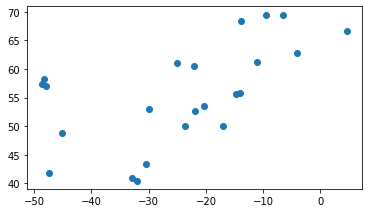

In [48]:
# prepare SST anomaly data from Capron et al (2017)

gdf_SST127ka = geopandas.GeoDataFrame(SST127ka, geometry = geopandas.points_from_xy(SST127ka.Longitude, SST127ka.Latitude))

#print(gdf_SST127ka.head())

#gdf_SST127ka.plot()

geo_SST127ka = gdf_SST127ka[['SST', 'geometry', 'Method']]

print(geo_SST127ka)

geo_SST127ka.plot()

cluster = np.array([1,1,1,1,2,3,2,2,4,2,4,2,2,2,2,5,5,6,1,2,2,6,2])


/Users/sophiesax/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/sophiesax/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/sophiesax/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


[]

/Users/sophiesax/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


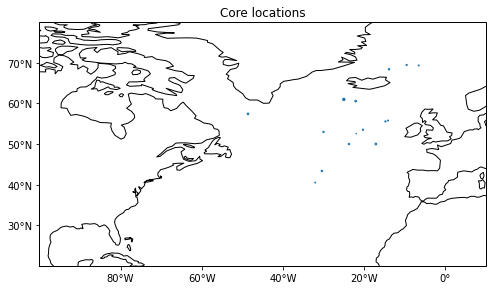

In [47]:
# plot SST reconstructions 

BBox = (-100, 10, 20, 80)

fig, ax = plt.subplots(figsize = (8,7), subplot_kw={'projection': ccrs.PlateCarree()})
ax.scatter(lons, lats, SST)
ax.set_title('Core locations')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.coastlines()
ax.set_xticks([-80, -60, -40, -20, 0], crs=ccrs.PlateCarree())
ax.set_yticks([30, 40, 50, 60, 70], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
ax.plot(extent = BBox)

#plt.savefig('Map_core_locations.png')

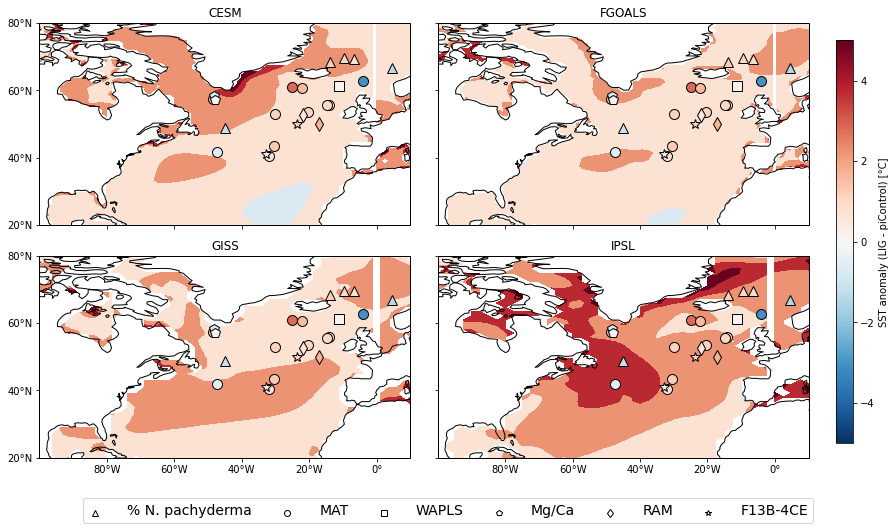

In [73]:
# calculating SST anomalies

SST_anomaly_CESM = sst_spatialmean_jja_a1 - sst_spatialmean_jja_b1
SST_anomaly_FGOALS = sst_spatialmean_jja_a2 - sst_spatialmean_jja_b2
SST_anomaly_GISS = sst_spatialmean_jja_a3 - sst_spatialmean_jja_b3
SST_anomaly_IPSL = sst_spatialmean_jja_a4 - sst_spatialmean_jja_b4

# figure of SST anomalies (LIG - piControl)

fig, axs = plt.subplots(2, 2, figsize = (16, 8), sharex = 'col', sharey = 'row', gridspec_kw = {'wspace':0.05, 'hspace':0.15}, subplot_kw={'projection': ccrs.PlateCarree()})
(ax1, ax2), (ax3, ax4) = axs
#fig.suptitle('SST (LIG)', fontsize = 16)

cmap = plt.get_cmap('RdBu_r')

cont = ax1.contourf(lon_a1, lat_a1, SST_anomaly_CESM, cmap = cmap, norm = mpl.colors.Normalize(vmin = -5, vmax = 5), transform = ccrs.PlateCarree())

cont = ax2.contourf(lon_a2, lat_a2, SST_anomaly_FGOALS, cmap = cmap, norm = mpl.colors.Normalize(vmin = -5, vmax = 5), transform = ccrs.PlateCarree())

cont = ax3.contourf(lon_a3, lat_a3, SST_anomaly_GISS, cmap = cmap, norm = mpl.colors.Normalize(vmin = -5, vmax = 5), transform = ccrs.PlateCarree())

cont = ax4.contourf(lon_a4, lat_a4, SST_anomaly_IPSL, cmap = cmap, norm = mpl.colors.Normalize(vmin = -5, vmax = 5), transform = ccrs.PlateCarree())

ax1.set_title('CESM')
ax2.set_title('FGOALS')
ax3.set_title('GISS')
ax4.set_title('IPSL')

SST_min = np.min(SST)
SST_max = np.max(SST)
for ii in range(0, len(SST)):
    if cluster[ii] == 1:
        x,y = lons[ii], lats[ii]
        color_interp = np.interp(SST[ii], [SST_min, SST_max], [50, 200])
        ax1.plot(x, y, marker = '^', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        ax2.plot(x, y, marker = '^', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        ax3.plot(x, y, marker = '^', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        ax4.plot(x, y, marker = '^', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
    
for ii in range(0, len(SST)):
    if cluster[ii] == 2:
        x,y = lons[ii], lats[ii]
        color_interp = np.interp(SST[ii], [SST_min, SST_max], [50, 200])
        ax1.plot(x, y, marker = 'o', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        ax2.plot(x, y, marker = 'o', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        ax3.plot(x, y, marker = 'o', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        ax4.plot(x, y, marker = 'o', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))

for ii in range(0, len(SST)):
    if cluster[ii] == 3:
        x,y = lons[ii], lats[ii]
        color_interp = np.interp(SST[ii], [SST_min, SST_max], [50, 200])
        ax1.plot(x, y, marker = 's', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        ax2.plot(x, y, marker = 's', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        ax3.plot(x, y, marker = 's', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        ax4.plot(x, y, marker = 's', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        
for ii in range(0, len(SST)):
    if cluster[ii] == 4:
        x,y = lons[ii], lats[ii]
        color_interp = np.interp(SST[ii], [SST_min, SST_max], [50, 200])
        ax1.plot(x, y, marker = 'p', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        ax2.plot(x, y, marker = 'p', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        ax3.plot(x, y, marker = 'p', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        ax4.plot(x, y, marker = 'p', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        
for ii in range(0, len(SST)):
    if cluster[ii] == 5:
        x,y = lons[ii], lats[ii]
        color_interp = np.interp(SST[ii], [SST_min, SST_max], [50, 200])
        ax1.plot(x, y, marker = 'd', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        ax2.plot(x, y, marker = 'd', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        ax3.plot(x, y, marker = 'd', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        ax4.plot(x, y, marker = 'd', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        
for ii in range(0, len(SST)):
    if cluster[ii] == 6:
        x,y = lons[ii], lats[ii]
        color_interp = np.interp(SST[ii], [SST_min, SST_max], [50, 200])
        ax1.plot(x, y, marker = '*', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        ax2.plot(x, y, marker = '*', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        ax3.plot(x, y, marker = '*', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        ax4.plot(x, y, marker = '*', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
        
ax1.coastlines()
ax2.coastlines()
ax3.coastlines()
ax4.coastlines()

ax1.set_xlim(-100, 10)
ax1.set_ylim(20, 80)

ax2.set_xlim(-100, 10)
ax2.set_ylim(20, 80)

ax3.set_xlim(-100, 10)
ax3.set_ylim(20, 80)

ax4.set_xlim(-100, 10)
ax4.set_ylim(20, 80)

ax1.set_xticks([-80, -60, -40, -20, 0], crs=ccrs.PlateCarree())
ax1.set_yticks([20, 40, 60, 80], crs=ccrs.PlateCarree())

ax2.set_xticks([-80, -60, -40, -20, 0], crs=ccrs.PlateCarree())
ax2.set_yticks([20, 40, 60, 80], crs=ccrs.PlateCarree())

ax3.set_xticks([-80, -60, -40, -20, 0], crs=ccrs.PlateCarree())
ax3.set_yticks([20, 40, 60, 80], crs=ccrs.PlateCarree())

ax4.set_xticks([-80, -60, -40, -20, 0], crs=ccrs.PlateCarree())
ax4.set_yticks([20, 40, 60, 80], crs=ccrs.PlateCarree())

ax1.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax1.yaxis.set_major_formatter(LATITUDE_FORMATTER)

ax2.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax2.yaxis.set_major_formatter(LATITUDE_FORMATTER)

ax3.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax3.yaxis.set_major_formatter(LATITUDE_FORMATTER)

ax4.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax4.yaxis.set_major_formatter(LATITUDE_FORMATTER)

fig.subplots_adjust(right = 0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.015, 0.7])
sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = -5, vmax = 5))
sm.set_array([])
cbar = fig.colorbar(sm, cax = cbar_ax)
cbar.ax.set_ylabel('SST anomaly (LIG - piControl) ['u"\N{DEGREE SIGN}"'C]')

from matplotlib.legend_handler import HandlerBase
list_edgecolor = ['black', 'black', 'black', 'black', 'black', 'black']
list_color = ['white', 'white', 'white', 'white', 'white', 'white']
list_mak = ['^', 'o', 's', 'p', 'd', '*']
list_lab = ['% N. pachyderma', 'MAT', 'WAPLS', 'Mg/Ca', 'RAM', 'F13B-4CE']
class MarkerHandler(HandlerBase):
    def create_artists(self, legend, tup,xdescent, ydescent,
                        width, height, fontsize,trans):
        return [plt.Line2D([width/4], [height/6.], ls="",
                       marker=tup[1],markeredgecolor=tup[0], color=tup[2], transform=trans)]


fig.legend(list(zip(list_edgecolor,list_mak, list_color)), list_lab, 
          handler_map={tuple:MarkerHandler()}, loc = 8, ncol = 6, fontsize = 14) 


#plt.setp(axs[-1, :], xlabel='longitude [degrees E]')
#plt.setp(axs[:, 0], ylabel='latitude [degrees N]')

#plt.savefig('SST_anomaly_with_paleodata_summer.png')

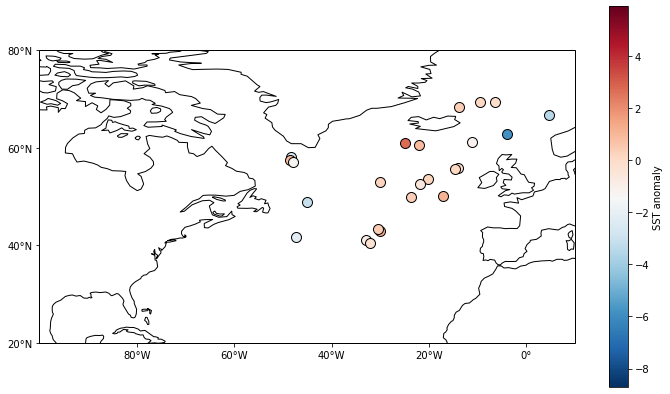

In [91]:
lats = SST127ka['Latitude']
lons = SST127ka['Longitude']
SST = SST127ka['SST']

fig, ax = plt.subplots(figsize = (12, 7), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.set_xlim(-100, 10)
ax.set_ylim(20, 80)
ax.set_xticks([-80, -60, -40, -20, 0], crs=ccrs.PlateCarree())
ax.set_yticks([20, 40, 60, 80], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

SST_min = np.min(SST)
SST_max = np.max(SST)
cmap = plt.get_cmap('RdBu_r')
normalize = mpl.colors.Normalize(vmin = SST_min, vmax = SST_max)

for ii in range(0, len(SST)):
    x,y = lons[ii], lats[ii]
    color_interp = np.interp(SST[ii], [SST_min, SST_max], [50, 200])
    plt.plot(x, y, marker = 'o', markeredgecolor = 'black', markersize = 10, color = cmap(int(color_interp)))
    
cax, _ = mpl.colorbar.make_axes(ax)
cbar = mpl.colorbar.ColorbarBase(cax, cmap = cmap, norm = normalize, label = 'SST anomaly')

